In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split

In [28]:
column_names = ['1','2','3','4','5','6','7']
column_names.append('Classification')

data = pd.read_csv("seeds_dataset.txt",names = column_names, sep='\t', header=None) 
data

,1,2,3,4,5,6,7,Classification
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [29]:
data.dtypes

1                 float64
2                 float64
3                 float64
4                 float64
5                 float64
6                 float64
7                 float64
Classification      int64
dtype: object

In [30]:
data['Classification'].unique()

array([1, 2, 3])

In [31]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Classification'] = label_encoder.fit_transform(data['Classification'])

In [32]:
X = data.drop('Classification', axis=1)
y = data['Classification']

In [33]:
X = np.array(X)
y = np.array(y)

# 10-Fold

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

num = 1
n = 0
precision = []
recall = []
accuracy = []
f1 = []

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X[train_idx],
                                                        y[train_idx],
                                                        test_size=0.25,
                                                        random_state=42)

    print(" ")
    print(f"Fold {num}:")
    print("_____________________________________________________________________________________________")
    
    clf = DecisionTreeClassifier(random_state = 42)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test, y_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average=None)
    rec = metrics.recall_score(y_test, y_pred,average=None)
    score = metrics.f1_score(y_test, y_pred,average=None)
    
    precision.append(prec)
    recall.append(rec)
    accuracy.append(acc)
    f1.append(score)
    
    print("Accuracy:",acc)
    print("y_true:", y_score)
    
    
    print(metrics.classification_report(y_test, y_pred))
    
    num = num+1
train_index = train_idx
test_index = test_idx

 
Fold 1:
_____________________________________________________________________________________________
Accuracy: 0.9375
y_true: 0.9375
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       1.00      1.00      1.00        17
           2       0.88      0.93      0.90        15

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48

 
Fold 2:
_____________________________________________________________________________________________
Accuracy: 0.9166666666666666
y_true: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       1.00      0.94      0.97        17
           2       0.83      1.00      0.91        15

    accuracy                           0.92        48
   macro avg       0.92      0.92      0.92        

In [37]:
avg_precision = np.sum(precision, axis=0)/len(precision)
avg_accuracy = np.sum(accuracy, axis=0)/len(accuracy)
avg_recall = np.sum(recall, axis=0)/len(recall)
avg_f1 = np.sum(f1, axis=0)/len(f1)

In [38]:
from statistics import mean
print(f'Average accuracy of 10-folds: {round(avg_accuracy,2)}')
print(f'Average precision of 10-folds: {round(mean(avg_precision), 2)}')
print(f'Average recall of 10-folds: {round(mean(avg_recall), 2)}')
print(f'Average F1 score of 10-folds: {round(mean(avg_f1), 2)}')

Average accuracy of 10-folds: 0.9
Average precision of 10-folds: 0.9
Average recall of 10-folds: 0.9
Average F1 score of 10-folds: 0.9


# Values of final fold values displayed

In [39]:
X_train_final = X[train_index]
y_train_final = y[train_index]
X_test_final = X[test_index]
y_test_final = y[test_index]

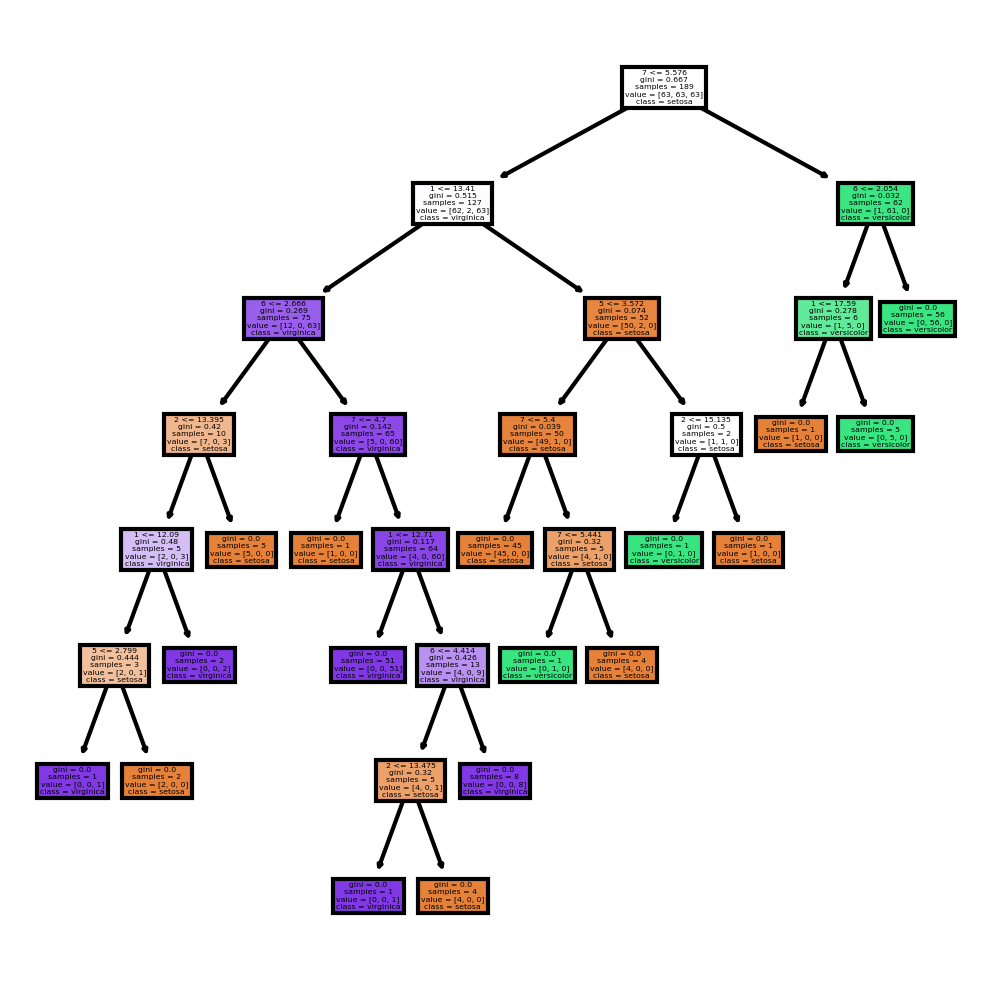

In [40]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train_final, y_train_final)
y_pred_final = clf.predict(X_test_final)

fn = column_names
cn = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

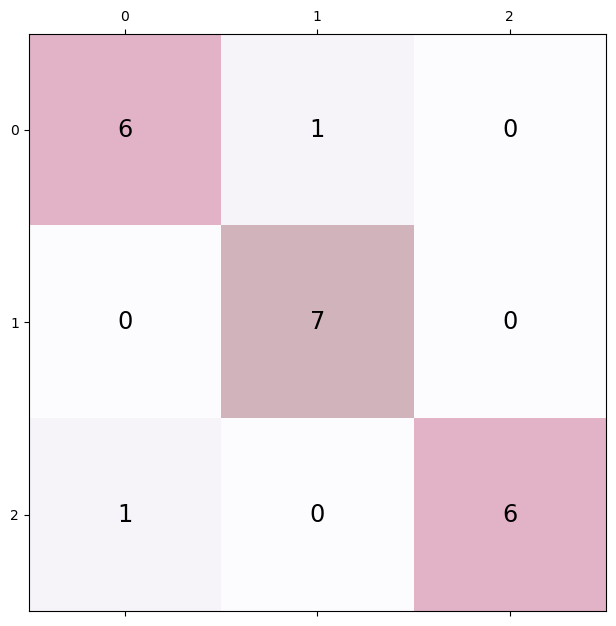

In [41]:
conf_matrix = metrics.confusion_matrix(y_test_final, y_pred_final)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap= 'PuRd', alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')